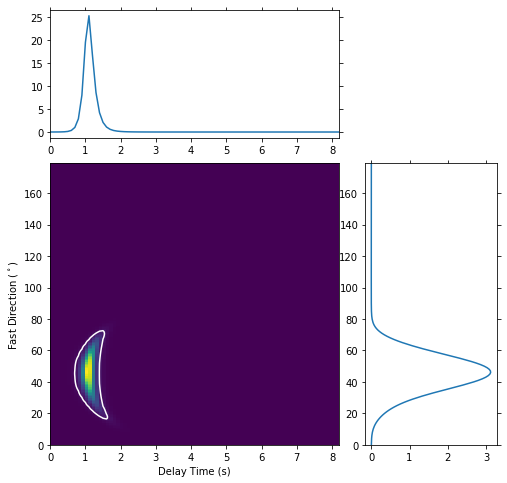

In [38]:
m = sw.synth(noise=0.05, split=(30,1.2))
m.psurf()

In [66]:
def getcov(m):
    return sw.core.cov2d(*m.data.chop().data)

def rotcov(cov, ang):
    """Rotate 2D Covariance matrix"""
    rot = sw.core._rot(ang)
    return np.dot(rot, cov)

def scan_pol(cov):
    """Scan aspect ratio over range of polarisation angles."""
    degs = np.linspace(0, 180, 180)
    scan = [ rotcov(cov, ang) for ang in degs ]
    aspectratio = [ x[1,1]/x[0,0] for x in scan]
    return aspectratio
    
# def bootcov(cov):

In [67]:
rotcov(cov, 5)

array([[ 3.09789184e-03,  4.36188292e-05],
       [-2.52979104e-04,  2.92238052e-04]])

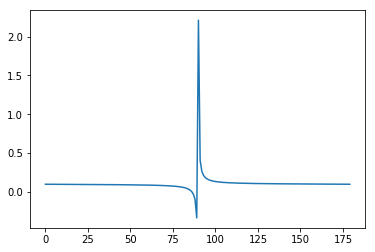

In [68]:
cov = getcov(m)
plt.plot(scan_pol(cov))
plt.show()

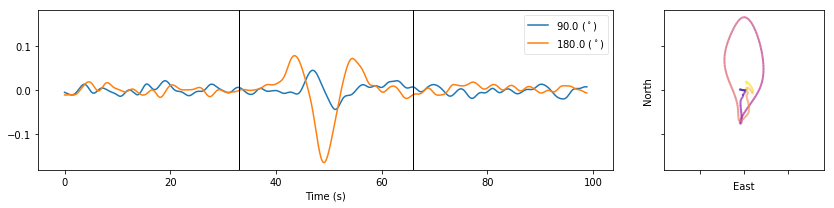

In [70]:
m.data.rotateto(90).plot()